### create a notebook named model.ipynb.



### 1)run all your previous scripts that acquired, prepared, split, and scaled your data.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from math import sqrt
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#import our scripts that do data science workflow
import wrangle
import split_scale_telco
import evaluate
import features

In [2]:
df=wrangle.wrangle_telco()
df.head()

,customer_id,total_charges,monthly_charges,tenure
0,0016-QLJIS,5957.90,90.45,65
1,0017-DINOC,2460.55,45.20,54
2,0019-GFNTW,2560.10,45.05,56
3,0056-EPFBG,825.40,39.40,20
4,0078-XZMHT,6316.20,85.15,72


In [3]:
train,test=split_scale_telco.split_my_data(df)

In [4]:
scaler, train_scaled, test_scaled=split_scale_telco.standard_scaler(train.drop(columns=['customer_id','total_charges']),test.drop(columns=['customer_id','total_charges']))

In [5]:
print(train_scaled.head())
print(test_scaled.head())

      monthly_charges    tenure
120         -0.349191  0.839851
1423        -1.184789 -1.700684
389          0.811120  0.839851
1137        -1.180459 -1.926509
1504        -1.036142  0.839851
      monthly_charges    tenure
308          0.838541  0.783394
455         -0.044682  0.670482
914          1.551469  0.839851
1420        -1.204993 -1.700684
1557         0.560008  0.783394


In [6]:
X_train=train_scaled
y_train=train[['total_charges']]
X_test=test_scaled
y_test=test[['total_charges']]

### 2)select your features using your features script

In [7]:
features.optimal_number_of_features(X_train,y_train,X_test,y_test)

1

In [8]:
features.optimal_features(X_train,y_train,1)

Index(['monthly_charges'], dtype='object')

### 3)fit 2 different linear models to your data

In [9]:
#model 1
lm1=LinearRegression()
lm1.fit(X_train[['monthly_charges']],y_train)
lm1_predictions=lm1.predict(X_train[['monthly_charges']])
model_1=pd.DataFrame(lm1_predictions)
model_1['total_charges']=y_train
model_1=model_1.rename(columns={0:'predicted_charges'})

#model 2
lm2=LinearRegression()
lm2.fit(X_train[['tenure']],y_train)
lm2_predictions=lm2.predict(X_train[['tenure']])
model_2=pd.DataFrame(lm2_predictions)
model_2['total_charges']=y_train
model_2=model_2.rename(columns={0:'predicted_charges'})

#baseline model
y_pred_baseline = np.array([y_train.mean()[0]]*len(y_train))
y_pred_baseline

array([3759.66194362, 3759.66194362, 3759.66194362, ..., 3759.66194362,
       3759.66194362, 3759.66194362])

### 4)evaluate the 2 models and your baseline.

In [10]:
MSE_baseline = mean_squared_error(y_train, y_pred_baseline)
SSE_baseline = MSE_baseline*len(y_train)
RMSE_baseline = sqrt(MSE_baseline)
r2_baseline = r2_score(y_train, y_pred_baseline)
print(MSE_baseline,SSE_baseline,RMSE_baseline,r2_baseline)

6612927.089508685 8914225716.657707 2571.5612163642313 0.0


In [11]:
MSE_1 = mean_squared_error(y_train, model_1.predicted_charges)
SSE_1 = MSE_1*len(y_train)
RMSE_1 = sqrt(MSE_1)
r2_1 = r2_score(y_train, model_1.predicted_charges)
print(MSE_1,SSE_1,RMSE_1,r2_1)

710410.3104002099 957633098.4194828 842.8584165802758 0.8925724870719858


In [12]:
MSE_2 = mean_squared_error(y_train, model_2.predicted_charges)
SSE_2 = MSE_2*len(y_train)
RMSE_2 = sqrt(MSE_2)
r2_2 = r2_score(y_train, model_2.predicted_charges)
print(MSE_2,SSE_2,RMSE_2,r2_2)

3930986.41713009 5298969690.291361 1982.6715353608347 0.40556029668517835


### 5)select the one that performed the best.
The model with monthly charges performed the best

### 6)apply to your test data

In [35]:
model=lm1.predict(X_test[['monthly_charges']])
model=model.ravel().reshape(337)
y_test=np.array(y_test).ravel().reshape(337)
best_model=pd.DataFrame({'predictions':model,'total_charges':y_test})

best_model.head()

,predictions,total_charges
0,5796.904720,6325.25
1,3651.107454,4069.90
2,7528.969834,8405.00
3,832.118888,520.55
4,5120.207216,5705.05


### 7)Write a function that creates the model object, fits and predicts,   given X_train, X_test, y_train, y_test

In [41]:
X_train=X_train[['monthly_charges']]
X_test=X_test[['monthly_charges']]
def modeling_function(X_train,X_test,y_train,y_test):
    lm1=LinearRegression()
    lm1.fit(X_train,y_train)
    lm1_predictions=lm1.predict(X_train)
    model_1=pd.DataFrame(lm1_predictions)
    model_1['actual_values']=y_train
    model_1=model_1.rename(columns={0:'predicted_values'})
    #fit another regression object for test data
    lm2=LinearRegression()
    lm2.fit(X_test,y_test)
    lm2_predictions=lm2.predict(X_test)
    model_2=pd.DataFrame(lm2_predictions)
    model_2['actual_values']=y_test
    model_2=model_2.rename(columns={0:'predicted_values'})
    return model_1,model_2

In [43]:
model_test,model_train=modeling_function(X_train,X_test,y_train,y_test)

In [45]:
model_test.head()
model_train.head()

,predicted_values,actual_values
0,5776.116363,6325.25
1,3646.407575,4069.90
2,7495.195025,8405.00
3,848.554853,520.55
4,5104.492513,5705.05


### 8)Write a function, plot_residuals(x, y, dataframe) that takes the feature, the target, and the dataframe as input and returns a residual plot.

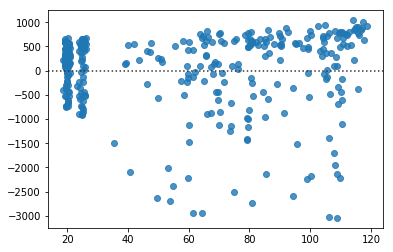

In [69]:
def plot_residuals(x, y):
    '''
    Plots the residuals of a model that uses x to predict y. Note that we don't
    need to make any predictions ourselves here, seaborn will create the model
    and predictions for us under the hood with the `residplot` function.
    '''
    return sns.residplot(x, y)

x=test[['monthly_charges']]
y=test[['total_charges']]
plot_residuals(x,y)

### 9)Write a function, plot_regression(x, y) that takes a feature and a target and returns the datapoints, the regression line, and the confidence interval.

In [70]:
res = sm.OLS(y, x).fit()

In [71]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_charges   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     8512.
Date:                Wed, 16 Oct 2019   Prob (F-statistic):          1.01e-240
Time:                        22:30:48   Log-Likelihood:                -2756.1
No. Observations:                 337   AIC:                             5514.
Df Residuals:                     336   BIC:                             5518.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
monthly_charges    63.1749      0.685     92.259      0.000      61.828      64.522
==============================================================================
Omnibus:                       62.586   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.685
Skew:                          -1.113   Prob(JB):                     3.72e-22
Kurtosis:                       4.440   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

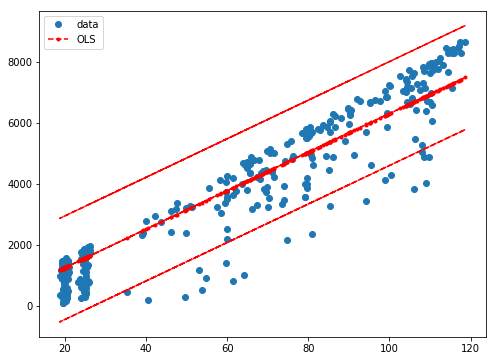

In [75]:
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
#ax.plot(x, y, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

In [76]:
def plot_regression(x,y):
    res = sm.OLS(y, x).fit()
    prstd, iv_l, iv_u = wls_prediction_std(res)

    fig, ax = plt.subplots(figsize=(8,6))

    ax.plot(x, y, 'o', label="data")
    #ax.plot(x, y, 'b-', label="True")
    ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
    ax.plot(x, iv_u, 'r--')
    ax.plot(x, iv_l, 'r--')
    ax.legend(loc='best');
    plt.show()
    

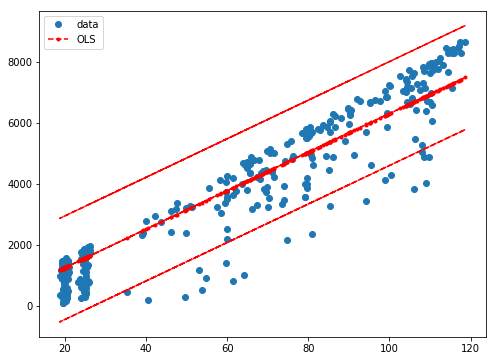

In [77]:
plot_regression(x,y)